# flight fare  prediction

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('dark_background')



In [2]:
df = pd.read_excel(r"C:\Users\NAVEEN\Downloads\flight-fare (1)\Flight_Fare.xlsx")


In [3]:
df.head(3)






,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
print(df['Date_of_Journey'].min(),'TO',df['Date_of_Journey'].max())

01/03/2019 TO 9/06/2019


# Domin analysis
## 1.The data speaks about the fare of various Airlines between the month of march 2019 to june 2019 and services betweeen different cities

## 2.target is price ,where we are trying to predict the fare of different airlines to different cities

# Basic checks

In [5]:
total_rows, total_columns = df.shape

In [6]:
print('total number of rows',total_rows)

total number of rows 10683


In [7]:
print('total number of columns',total_columns)

total number of columns 11


In [9]:
df.columns# checking wether there is any column has unknown names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.head(5)# first five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.tail()
#last five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [12]:
df.info()
#out of 10683 records there are some null values we need to handle it
# as there are some  object type of datas we need to do encoding
# we need to convert some columns to date time columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
df.describe()
# here we can see the min fare of airlines strats from 1759
# and max fare is 79512

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# EDA

In [14]:
def value_counts(data,column):
    return data[column].value_counts()# created value_count as one function 

In [15]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

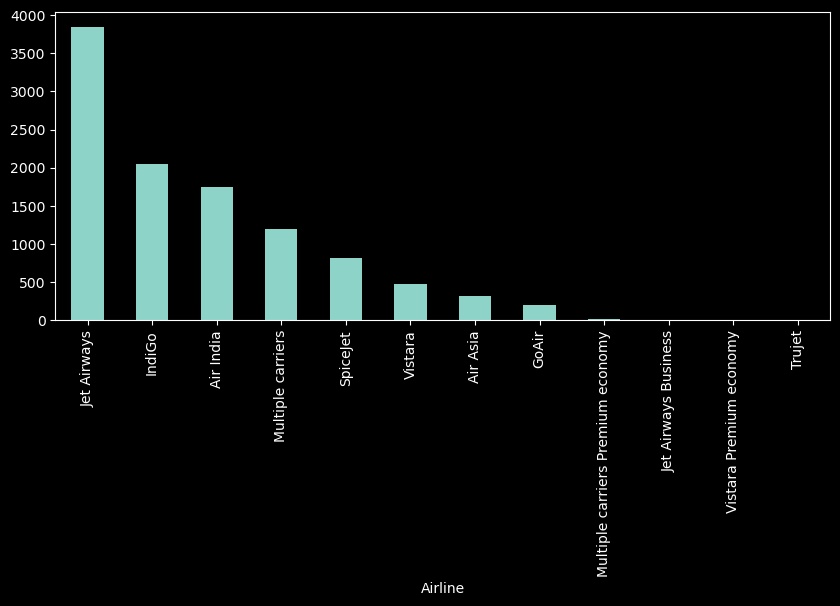

In [16]:
value_counts(df,column='Airline').plot(figsize=(10,4),kind='bar')
plt.show()

### insights :  
* jet airways operates the largest number of flights,follwed by indigo and Air india ,showing that these three airlines can dominate the the Airline Market
* meanwile truejet has very leass airway compared to other airways


### univarate eda on Date_of_Journey feature

In [17]:
df['Date_of_Journey'].min(),df['Date_of_Journey'].max()


('01/03/2019', '9/06/2019')

* insight  the data is about 2019 year from march to june
* in this feature we can extract day and month separtely as here we have only one year so no need of extracting year separetley

### eda on Source feature

In [18]:
value_counts(data=df,column= 'Source')

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

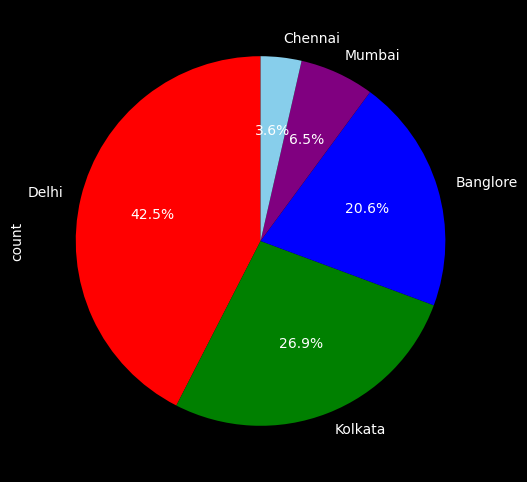

In [19]:
value_counts(data=df,column= 'Source').plot(figsize=(8,6),kind= 'pie',autopct='%1.1f%%', startangle=90,colors=['red','green','blue','purple','skyblue'])
plt.show()

## insight 
* about 42% percentage  of airlines source city is from delhi followed by Kolkata has 26.9% and bangalore has 20.6%

* but only 3.6% arlines source from chennai

### eda on Destination feature

In [19]:
value_counts(data=df,column='Destination')

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

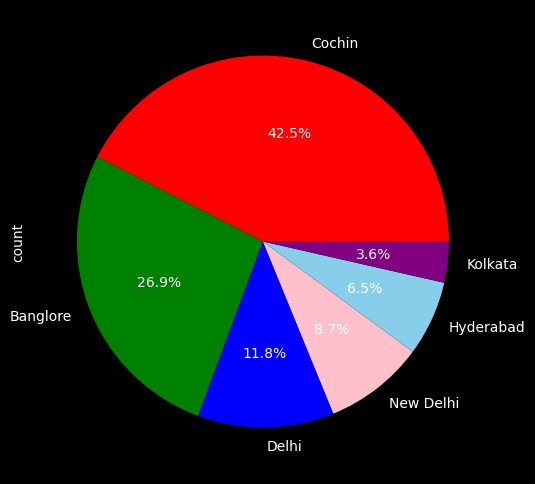

In [20]:
value_counts(data=df,column='Destination').plot(figsize=(6,7),kind='pie',autopct='%1.1f%%',colors=['red','green','blue','pink','skyblue','purple'])
plt.show()

## insight 
* Cochin is the most popular flight destination with more arrivals than any other city, followed by Bangalore. Delhi and New Delhi also receive moderate flights, while Hyderabad and Kolkata relatively have few flights.

### eda on Dep_time feature

In [21]:
print('earliest journey begain from source at',df['Dep_Time'].min())

earliest journey begain from source at 00:20


### insight
* it shows the earliest flight starts at 12:20 

# Bivariate anyalses

In [22]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [22]:
def box_plot(df,x,y,title=None):
    #plt.style.use('dark_background')
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df.sort_values('Price',ascending=False),x=x,y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=90)
   
    plt.title(title,fontsize=20)
    
  
    plt.show()

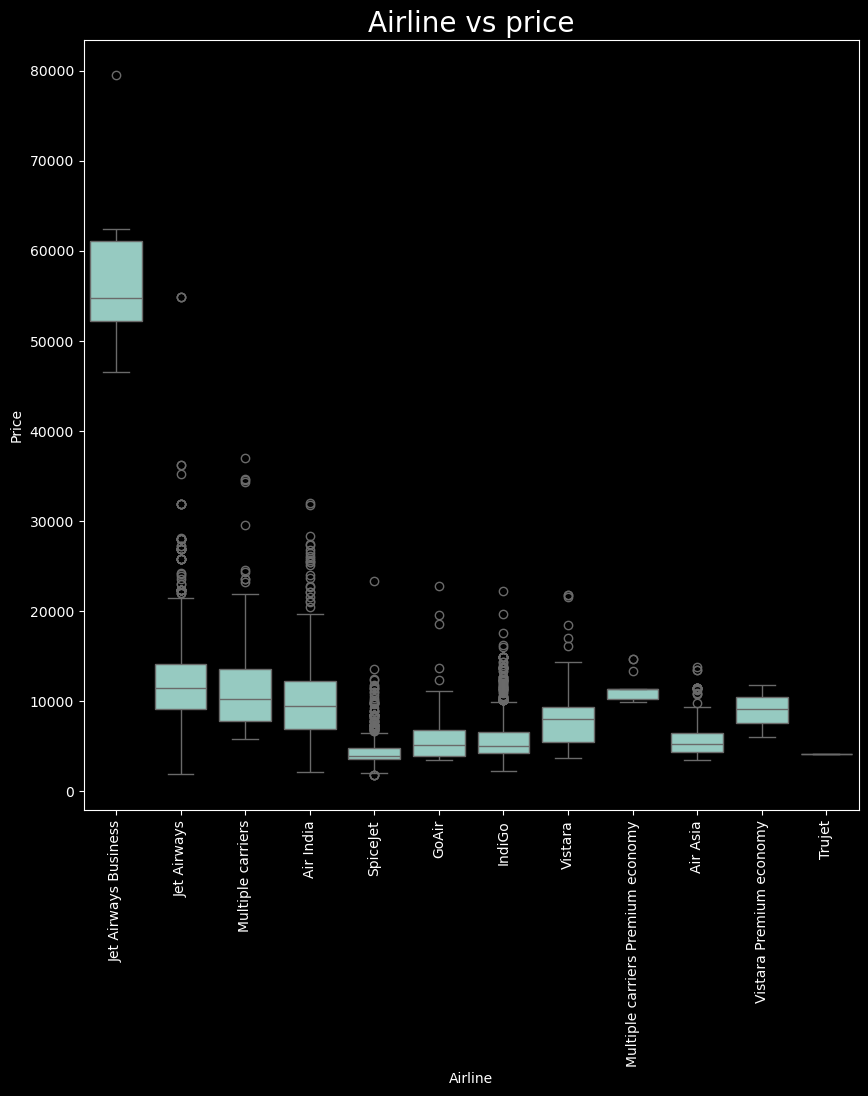

In [23]:
box_plot(df=df,x='Airline',y='Price',title='Airline vs price')


### insight
* most airlines, including Indigo, Air India, and Jet Airways, have ticket prices around 5,000, with some variation and many outliers.
* Jet Airways Business clearly stands out for its much higher fares, above 50,000.Maybe for it's premium offerings.

In [24]:
df['month_of_Journey']  = pd.to_datetime(df['Date_of_Journey']).dt.month


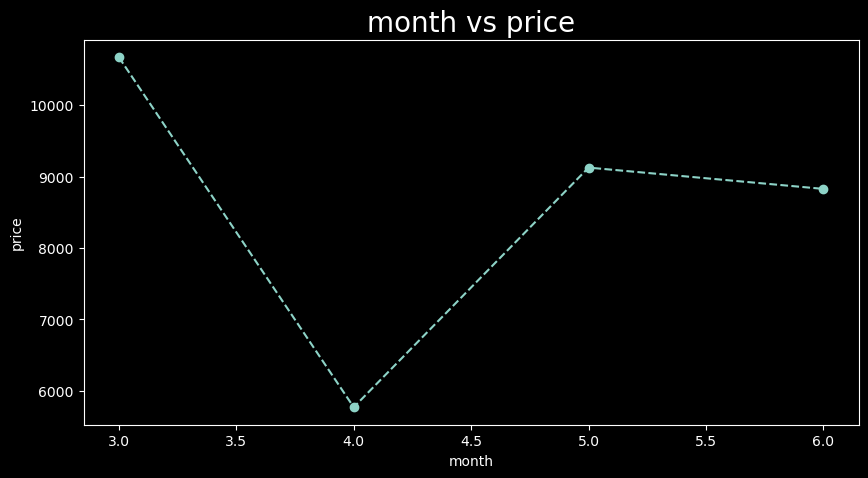

In [25]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby(df['month_of_Journey'])['Price'].mean(),marker='o',ls='dashed')

plt.xlabel('month')
plt.ylabel('price')
plt.title('month vs price',fontsize=20)
plt.show()

## insight
* the graph shows that averagely the  price was high in the month of march but it was desreased in the month of april
and there was  increase in the month of may and again slightly decreased in the month of june

In [26]:
df.drop(columns='month_of_Journey',axis=1,inplace=True)

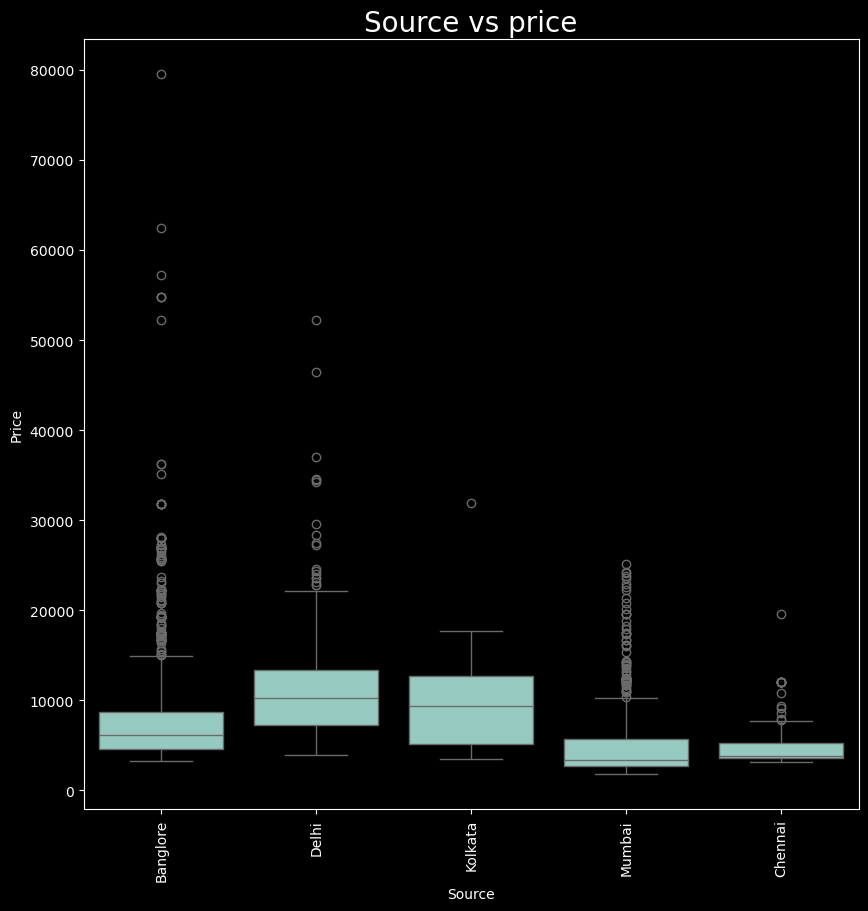

In [27]:
box_plot(df=df,x='Source',y='Price',title='Source vs price')

## insight 
* the persons who travaled from banglore has paid more price it means that they may travelled to long Destination

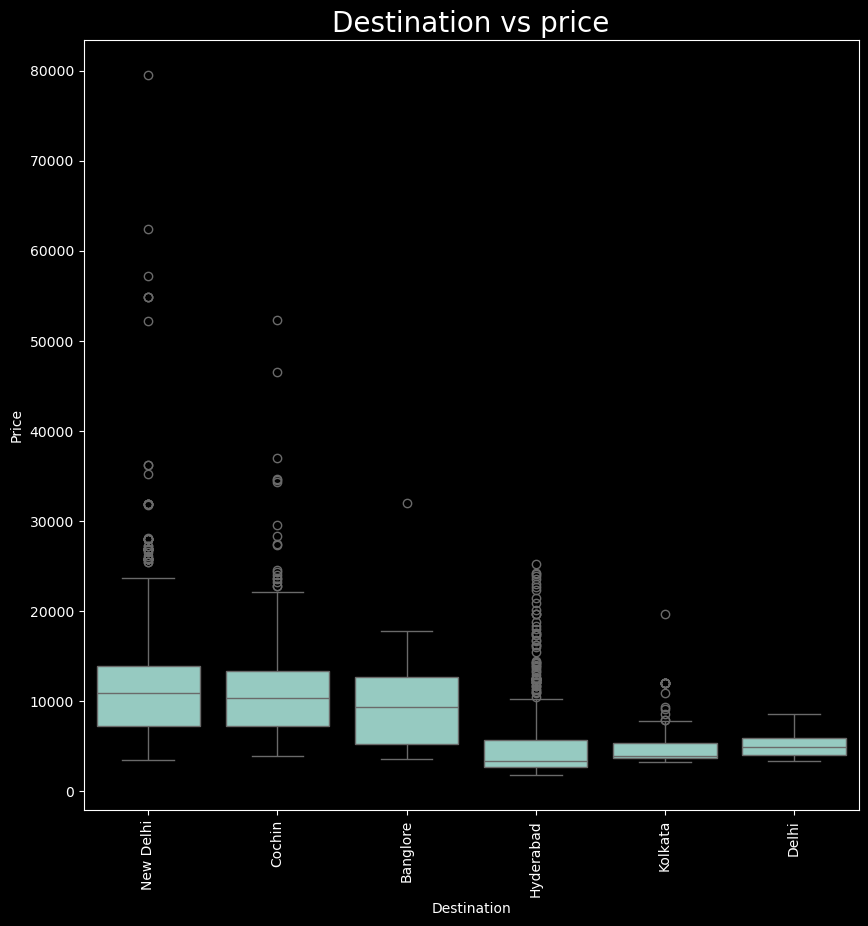

In [28]:
box_plot(df=df,x='Destination',y='Price',title='Destination vs price')

# insight
* the chart  shows that most of peoples had a journey from banglore to new Delhi 


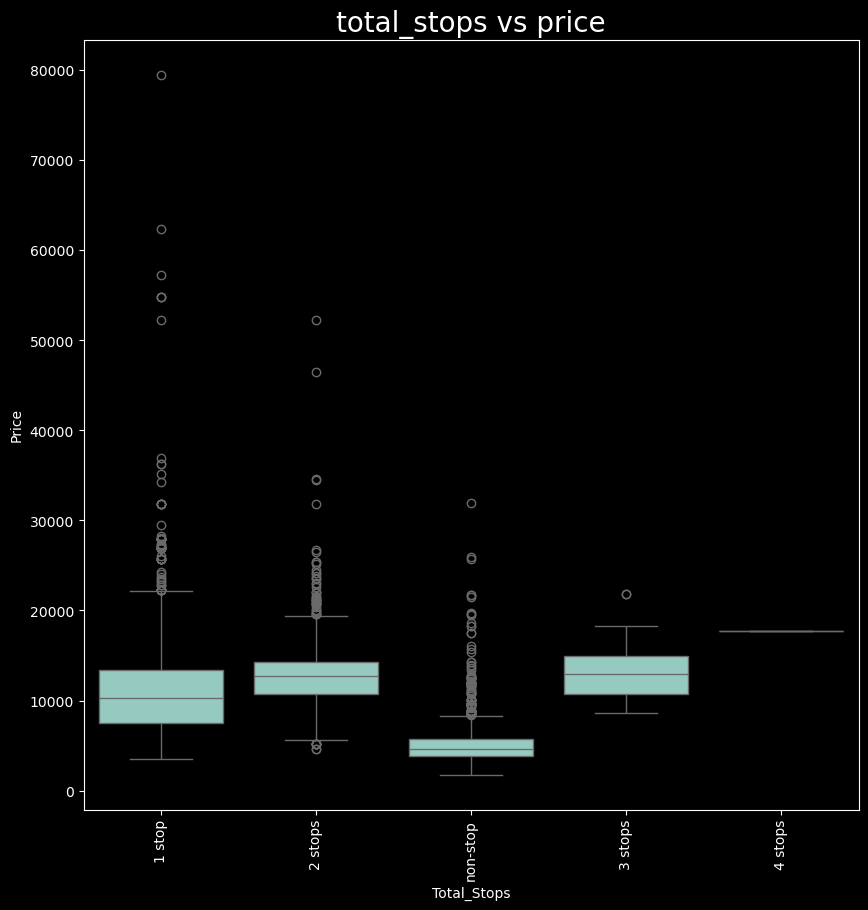

In [29]:
box_plot(df=df,x='Total_Stops',y='Price',title='total_stops vs price')

## insight 
* as the stop  decreases the price  increases here we can can say from source to Destination the airline which has     only one stop the fare is high
*  but whereas in non stop the price is low compared to one stop these may be people are less who travelled from Source to Destination directly
*  we found 4 stops as outlier 

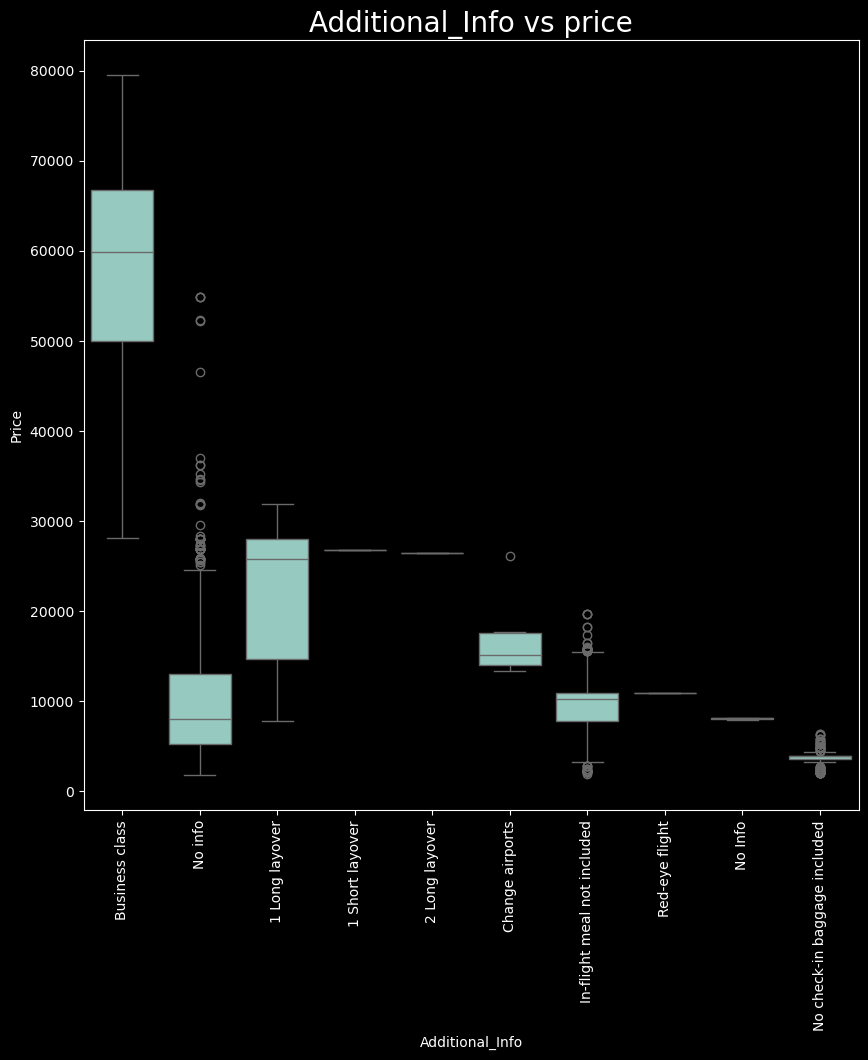

In [30]:
box_plot(df,x = 'Additional_Info',y = 'Price',title='Additional_Info vs price')


## insight
* From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.


# Preprocessing of Data

In [34]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()

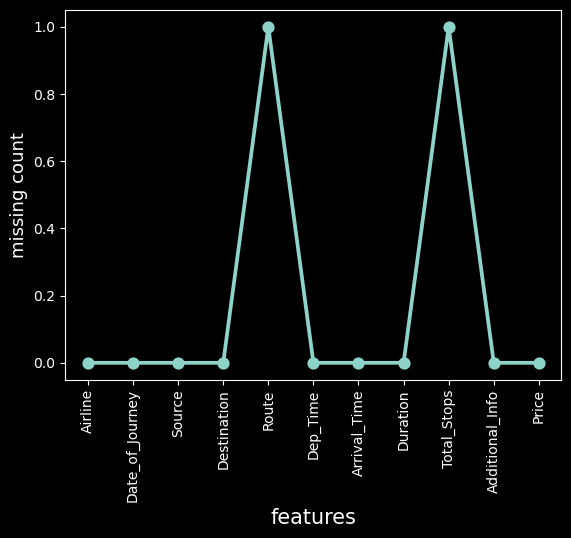

In [40]:
sns.pointplot(data=missing,x='index',y=0)
plt.xticks(rotation=90)
plt.xlabel('features',fontsize=15)
plt.ylabel('missing count',fontsize=13)
plt.show()

In [41]:
df.isnull().sum()[df.isnull().sum()>0]
# here we found Total_stops and Route has one one null counts

Route          1
Total_Stops    1
dtype: int64

In [42]:
df.dropna(inplace=True)#null values removed succesfully

In [43]:
df.isnull().sum().sum()

np.int64(0)

In [46]:
df['day_of_journey']  = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [47]:
df['month_of_journey']  = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [48]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [49]:
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute


In [50]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour



In [51]:
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute



In [52]:
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [53]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [54]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15


# Preprocessing on categrical data

In [55]:
categrical_data = df.select_dtypes(include='object')


In [56]:
categrical_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [57]:
def unique(data,column):
    print(data[column].unique())
    print(50*'-')
    return print('Total no  of unique values in',column,'column is',len(data[column].unique()))
         


In [58]:
unique(df,column='Airline')

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
--------------------------------------------------
Total no  of unique values in Airline column is 12


In [59]:
Airline = pd.get_dummies(df['Airline'],drop_first=True,dtype=int,prefix='Airline')

In [60]:
print('after droping first column we got encoded column lenght as ',len(Airline.columns))

after droping first column we got encoded column lenght as  11


In [61]:
unique(df,'Source')

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
--------------------------------------------------
Total no  of unique values in Source column is 5


In [62]:
source = pd.get_dummies(df['Source'],drop_first=True,dtype=int,prefix='Source')

In [63]:
print('after droping first column we got encoded column lenght as ',len(source.columns))

after droping first column we got encoded column lenght as  4


In [64]:
unique(df,'Destination')

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
--------------------------------------------------
Total no  of unique values in Destination column is 6


In [65]:
Destination = pd.get_dummies(df['Destination'],drop_first=True,dtype=int,prefix='Destination')

In [66]:
print('after droping first column we got encoded column lenght as ',len(Destination .columns))

after droping first column we got encoded column lenght as  5


In [67]:
unique(df,'Route')

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [68]:
route = pd.get_dummies(df['Route'],drop_first=True,prefix='Route',dtype=int)

In [69]:
print('after droping first column we got encoded column lenght as ',len(route.columns))

after droping first column we got encoded column lenght as  127


In [70]:
unique(df,'Total_Stops')

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
--------------------------------------------------
Total no  of unique values in Total_Stops column is 5


In [71]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


In [72]:
print('done ordinal Encoding Succesfully',unique(df,'Total_Stops'))

[0 2 1 3 4]
--------------------------------------------------
Total no  of unique values in Total_Stops column is 5
done ordinal Encoding Succesfully None


In [73]:
unique(df,'Additional_Info')


['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
--------------------------------------------------
Total no  of unique values in Additional_Info column is 10


In [74]:
df['Additional_Info']=df['Additional_Info'].str.upper().replace({'No Info':'No info'})

In [75]:
addition_info = pd.get_dummies(df['Additional_Info'],drop_first=True,prefix='Additional_Info',dtype=int)

In [76]:
print('after droping first column we got encoded column lenght as ',len(addition_info .columns))

after droping first column we got encoded column lenght as  8


In [77]:
df.drop(columns=['Airline', 'Source', 'Destination', 'Route','Additional_Info'],axis=1,inplace=True)

In [78]:
new_df = pd.concat([Airline,source,Destination,addition_info,route,df],axis=1)

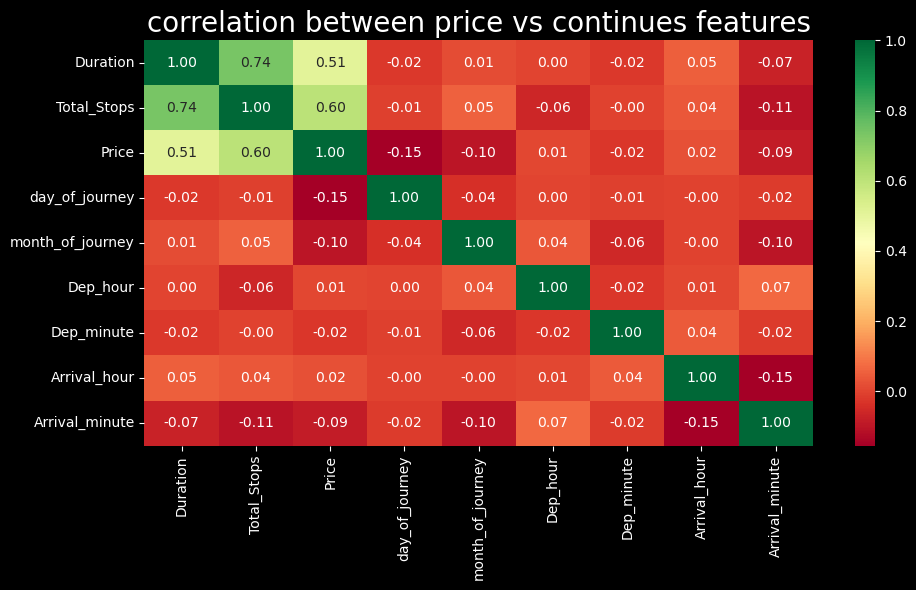

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap = "RdYlGn")
plt.title('correlation between price vs continues features',fontsize=20)
plt.tight_layout()
plt.show()

if two indpendent features are correlated more that 80% we can drop either one of the independent feture

* separting input and ouput column separetly

In [80]:
x = new_df.drop(columns='Price',axis=1)

In [81]:
y = new_df['Price']

In [82]:
from sklearn.ensemble import ExtraTreesRegressor

In [83]:
selection = ExtraTreesRegressor()

In [84]:
selection.fit(x,y)

ExtraTreesRegressor()

In [85]:
feature_importance = pd.Series(selection.feature_importances_,index=x.columns)

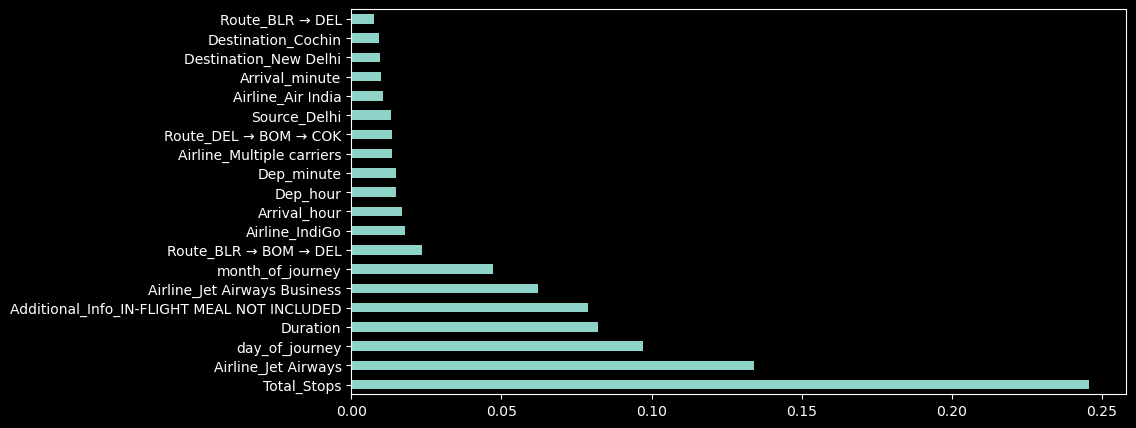

In [87]:
plt.figure(figsize = (10,5))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

# Model Training and Evaluation

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
x.shape,x_train.shape,x_test.shape


((10682, 163), (8545, 163), (2137, 163))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [93]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred_1 = linear_regressor.predict(x_test)
y_train_1 = linear_regressor.predict(x_train)


In [95]:
def distplot(y_test,y_pred):
    sns.distplot(y_test-y_pred)
    plt.show()

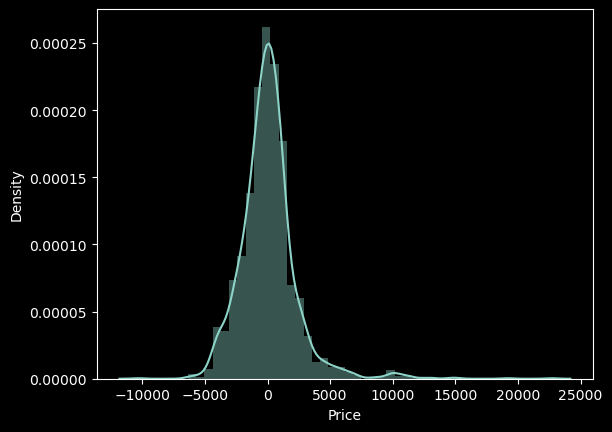

In [96]:
distplot(y_test,y_pred_1)

In [97]:
def scatter(y_test,y_pred):
 plt.scatter(y_test,y_pred)
 
 plt.xlabel('y_test')
 plt.ylabel('y_pred')
 plt.show()


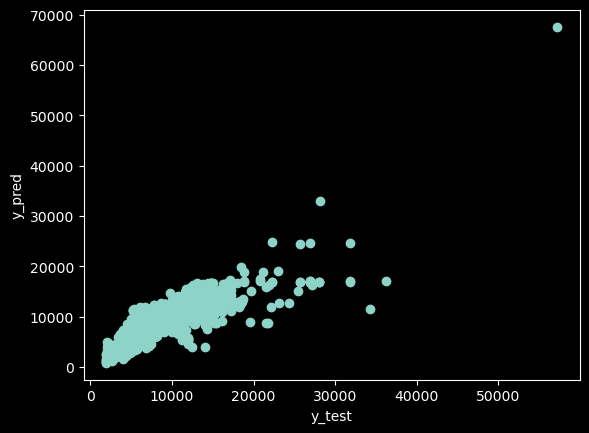

In [98]:
scatter(y_test,y_pred_1)

In [99]:
print('Train Results for linear regression')
print(50*'-')
print('MAE :',round(mean_absolute_error(y_train,y_train_1)),4)
print('MSE :',round(mean_squared_error(y_train,y_train_1)),4)
print('RMSE :',round(np.sqrt(mean_squared_error(y_train,y_train_1)),4))
print('r_squared :' ,round(r2_score(y_train,y_train_1),4)*100)
      

Train Results for linear regression
--------------------------------------------------
MAE : 1513 4
MSE : 5302906 4
RMSE : 2302.8039
r_squared : 74.97


In [100]:
print('Test Results for Linear Rergression')
print(50*'-')
print('MAE:',round( mean_absolute_error(y_test,y_pred_1),4))
print('MSE:', round(mean_squared_error(y_test, y_pred_1),4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred_1)),4))
print('R_squared',round(r2_score(y_test,y_pred_1)*100,2))


Test Results for Linear Rergression
--------------------------------------------------
MAE: 1535.0431
MSE: 5340544.4854
RMSE: 2310.9618
R_squared 75.23


In [101]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [102]:
y_pred_2 = decision_tree_regressor.predict(x_test)
y_train_2 = decision_tree_regressor.predict(x_train)

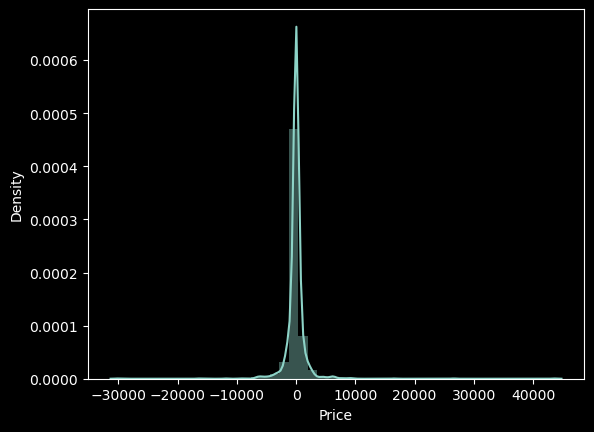

In [103]:
distplot(y_test,y_pred_2)

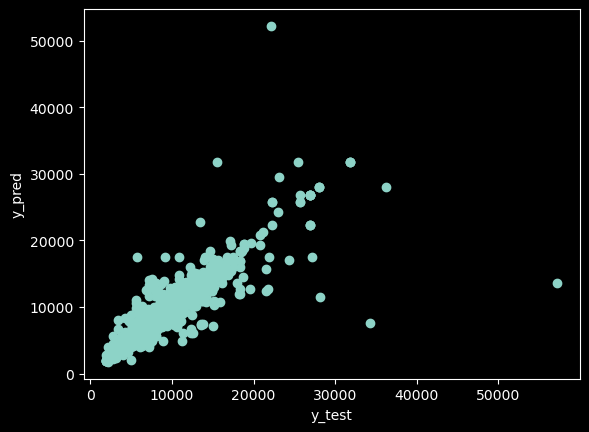

In [104]:
scatter(y_test,y_pred_2)

In [105]:
print('Train Results for Decision_Tree_Regressor')
print(50*'-')
print('MAE :',round(mean_absolute_error(y_train,y_train_2),4))
print('MSE :',round(mean_squared_error(y_train,y_train_2),4))
print('RMSE :',round(np.sqrt(mean_squared_error(y_train,y_train_2)),4))
print('R_Squared :' ,round(r2_score(y_train,y_train_2)*100,2))
      

Train Results for Decision_Tree_Regressor
--------------------------------------------------
MAE : 42.5271
MSE : 94759.3167
RMSE : 307.83
R_Squared : 99.55


In [106]:
print('Test Results for Decision_Tree_Regressor')
print(50*'-')
print('MAE:',round( mean_absolute_error(y_test, y_pred_2),4))
print('MSE:', round(mean_squared_error(y_test, y_pred_2),4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred_2)),4))
print('R_squared',round(r2_score(y_test,y_pred_2)*100,2))

Test Results for Decision_Tree_Regressor
--------------------------------------------------
MAE: 644.6155
MSE: 3614275.3148
RMSE: 1901.1247
R_squared 83.24


In [107]:
random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [109]:
y_pred_3 = random_forest_regressor.predict(x_test)
y_train_3= random_forest_regressor.predict(x_train)

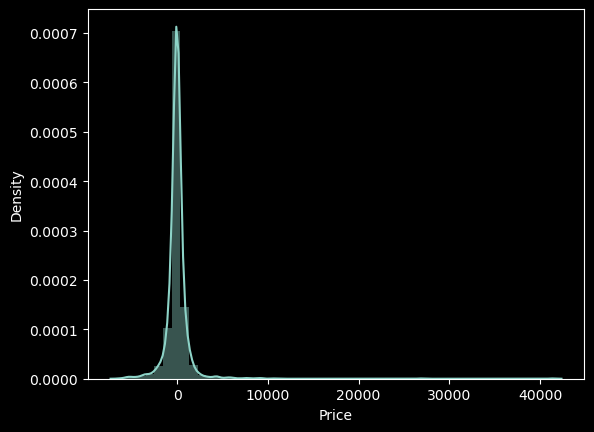

In [110]:
distplot(y_test,y_pred_3)

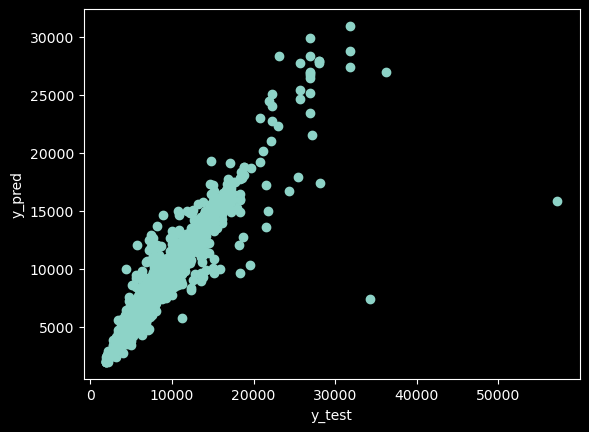

In [111]:
scatter(y_test,y_pred_3)

In [112]:
print('Train Results for Random_forest_Regressor')
print(50*'-')
print('MAE :',round(mean_absolute_error(y_train,y_train_3),4))
print('MSE :',round(mean_squared_error(y_train,y_train_3),4))
print('RMSE :',round(np.sqrt(mean_squared_error(y_train,y_train_3)),4))
print('R_Squared :',round(r2_score(y_train,y_train_3)*100,3))
      

Train Results for Random_forest_Regressor
--------------------------------------------------
MAE : 248.4812
MSE : 359449.7888
RMSE : 599.5413
R_Squared : 98.304


In [113]:
print('Test Results for Random_forest_Regressor')
print(50*'-')
print('MAE:',round( mean_absolute_error(y_test,y_pred_3 ),4))
print('MSE:', round(mean_squared_error(y_test, y_pred_3),4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_pred_3)),4))
print('R_squared',round(r2_score(y_test,y_pred_3),4)*100)

Test Results for Random_forest_Regressor
--------------------------------------------------
MAE: 593.784
MSE: 2389335.8105
RMSE: 1545.7477
R_squared 88.92


In [114]:
xgboost_regressor = XGBRegressor(random_state=42)
xgboost_regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [115]:
y_pred_4 = xgboost_regressor.predict(x_test)
y_train_4 = xgboost_regressor.predict(x_train)

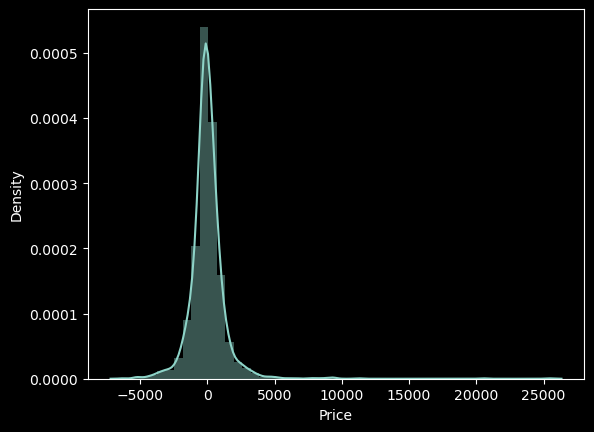

In [116]:
distplot(y_test,y_pred_4)

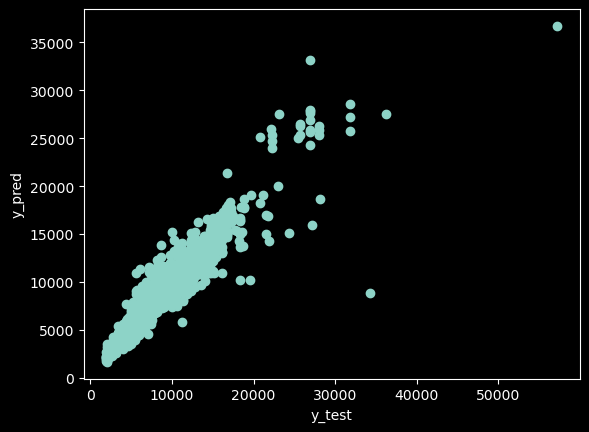

In [117]:
scatter(y_test,y_pred_4)

In [118]:
print('Train Results for XGboost')
print(50*'-')
print('MAE :',round(mean_absolute_error(y_train,y_train_4),4))
print('MSE :',round(mean_squared_error(y_train,y_train_4),4))
print('RMSE :',round(np.sqrt(mean_squared_error(y_train,y_train_4))),4)
print('R_squared:',round( r2_score(y_train,y_train_4)*100,2))
      

Train Results for XGboost
--------------------------------------------------
MAE : 657.1476
MSE : 1083995.75
RMSE : 1041 4
R_squared: 94.88


In [119]:
print('Test Results for XGboost')
print(50*'-')
print('MAE:',round( mean_absolute_error(y_test,y_pred_4 ),4))
print('MSE:', round(mean_squared_error(y_test,y_pred_4),4))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test,y_pred_4)),4))
print('R_squared',round(r2_score(y_test,y_pred_4),4)*100)

Test Results for XGboost
--------------------------------------------------
MAE: 801.1575
MSE: 2024576.875
RMSE: 1422.8763
R_squared 90.61


## Model Selection
* Among multiple models ,based on R_squared training and test and error  XGBoostRegressor is selected as best model which as train score of 94.88 and test score of 90.61 there was bit of overfitting so need to do hypertune to reduce overfitting

# hyperparameter Tuning on XGBoostRegressor

In [122]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
best_model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
best_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='neg_mean_absolute_error')

In [87]:
print("Best Parameters:",best_model.best_params_)

Best Parameters: {'reg_lambda': 10.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1}


In [124]:
final_model = XGBRegressor(reg_lambda=10.0,n_estimators=400,max_depth=5,learning_rate=0.1,random_state=42)

In [125]:
final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [126]:
train_pred = final_model.predict(x_train)

In [127]:
test_pred = final_model.predict(x_test)

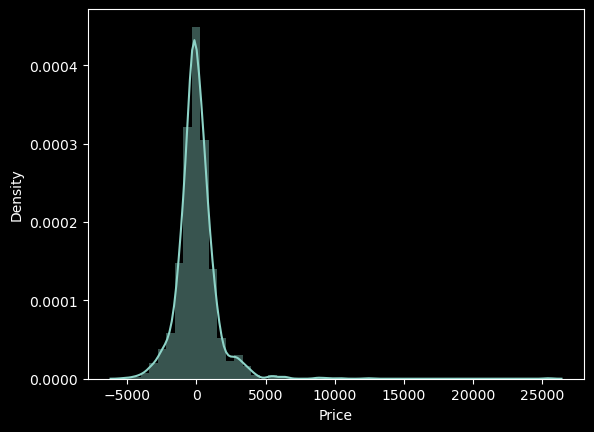

In [128]:
distplot(y_test,test_pred)

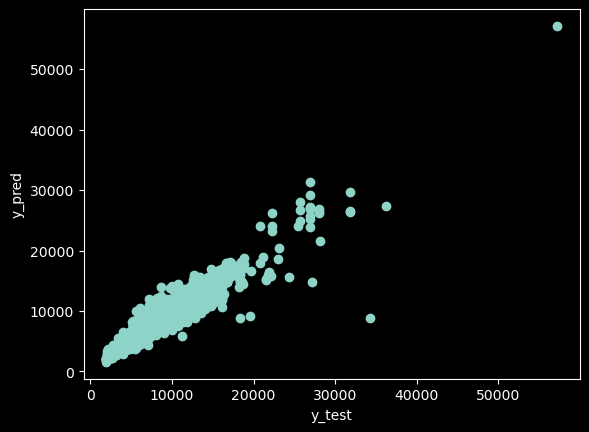

In [129]:
scatter(y_test,test_pred)

In [130]:
print('Train Results after Final_Model')
print(50*'-')
print('MAE:',round(mean_absolute_error(y_train,train_pred),4))
print('MSE:',round(mean_squared_error(y_train,train_pred),4))
print('RMSE:',round(np.sqrt(mean_squared_error(y_train,train_pred)),4))
print('R_SQUARED:',round(r2_score(y_train,train_pred)*100,2))

Train Results after Final_Model
--------------------------------------------------
MAE: 856.3394
MSE: 1724326.375
RMSE: 1313.1361
R_SQUARED: 91.86


In [131]:
print('Train Results after Final_Model')
print(50*'-')
print('MAE:',round(mean_absolute_error(y_test,test_pred),4))
print('MSE:',round(mean_squared_error(y_test,test_pred),4))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,test_pred)),4))
print('R_SQUARED:',round(r2_score(y_test,test_pred)*100,2))

Train Results after Final_Model
--------------------------------------------------
MAE: 920.2264
MSE: 2137108.5
RMSE: 1461.8853
R_SQUARED: 90.09


## After hypertuning we reduced overfitting 
*  Train Accuracy score is 91 percentage 
* Test Accuracy score is 90 percentage
* final model is XGBRegressor

In [136]:
import pickle

In [140]:
joblib.dump(final_model,open("xgboost.pkl","wb"))

In [141]:
pickled_model = pickle.load(open("xgboost.pkl","rb"))

In [ ]:
pickled_model